# Pengolahan Data Pasang Surut II

In [2]:
import scipy as sp
import scipy.fftpack
import pandas as pd
import numpy as np
from numpy import fft
import matplotlib
from matplotlib import pyplot as plt
from pandas import Series, date_range, DataFrame
import math
from pytides.tide import Tide
import plotly.figure_factory as ff

In [50]:
from pytides.tide import Tide

In [3]:
df = pd.read_csv('Data_Pasut_Jakarta.csv')

In [4]:
df

Unnamed: 0  Tahun  Bulan  Hari  Jam  elevasi (m)
0         175320   2004      1     1    0      -32.767
1         175321   2004      1     1    1      -32.767
2         175322   2004      1     1    2      -32.767
3         175323   2004      1     1    3      -32.767
4         175324   2004      1     1    4      -32.767
...          ...    ...    ...   ...  ...          ...
6261      181581   2004      9    17   21        2.090
6262      181582   2004      9    17   22        2.070
6263      181583   2004      9    17   23        2.070
6264      181584   2004      9    18    0        2.100
6265      181585   2004      9    18    1        2.120

[6266 rows x 6 columns]

In [5]:
tanggal = date_range(start='01/01/2004 00:00:00', end = '09/18/2004 01:00:00', freq = '1H' )

In [6]:
type(tanggal)

pandas.core.indexes.datetimes.DatetimeIndex

In [7]:
len(tanggal)

6266

In [8]:
elevasi = np.array(df['elevasi (m)'])
len(elevasi)

6266

In [9]:
df['tanggal'] = tanggal

In [10]:
df

Unnamed: 0  Tahun  Bulan  Hari  Jam  elevasi (m)             tanggal
0         175320   2004      1     1    0      -32.767 2004-01-01 00:00:00
1         175321   2004      1     1    1      -32.767 2004-01-01 01:00:00
2         175322   2004      1     1    2      -32.767 2004-01-01 02:00:00
3         175323   2004      1     1    3      -32.767 2004-01-01 03:00:00
4         175324   2004      1     1    4      -32.767 2004-01-01 04:00:00
...          ...    ...    ...   ...  ...          ...                 ...
6261      181581   2004      9    17   21        2.090 2004-09-17 21:00:00
6262      181582   2004      9    17   22        2.070 2004-09-17 22:00:00
6263      181583   2004      9    17   23        2.070 2004-09-17 23:00:00
6264      181584   2004      9    18    0        2.100 2004-09-18 00:00:00
6265      181585   2004      9    18    1        2.120 2004-09-18 01:00:00

[6266 rows x 7 columns]

{'whiskers': [<matplotlib.lines.Line2D at 0x25406de54c0>,
 'caps': [<matplotlib.lines.Line2D at 0x25406de5a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x25406de51f0>],
 'medians': [<matplotlib.lines.Line2D at 0x25408e06040>],
 'fliers': [<matplotlib.lines.Line2D at 0x25408e06310>],
 'means': []}

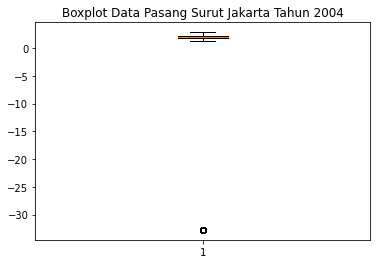

In [11]:
#buat boxplot untuk melihat apakah ada data yang outlier
fig1, ax1 = plt.subplots()
ax1.set_title('Boxplot Data Pasang Surut Jakarta Tahun 2004')
ax1.boxplot(df['elevasi (m)'])

In [12]:
#mencari Q1 dan Q3
Q1 = df['elevasi (m)'].quantile(0.25)
Q1

1.86

In [13]:
Q3 = df['elevasi (m)'].quantile(0.75)
Q3

2.2779999999999996

In [14]:
IQR = Q3 - Q1
IQR

# batas min Q1-1.5*IQR & max Q3+1.5*IQR

0.4179999999999995

In [15]:
#melakukan cleansing data
df = df[~((df['elevasi (m)'] < (Q1 - 1.5*IQR)) | (df['elevasi (m)'] > (Q3 + 1.5*IQR)))]


In [16]:
df

Unnamed: 0  Tahun  Bulan  Hari  Jam  elevasi (m)             tanggal
103       175423   2004      1     5    7         1.96 2004-01-05 07:00:00
104       175424   2004      1     5    8         1.81 2004-01-05 08:00:00
105       175425   2004      1     5    9         1.66 2004-01-05 09:00:00
106       175426   2004      1     5   10         1.55 2004-01-05 10:00:00
107       175427   2004      1     5   11         1.48 2004-01-05 11:00:00
...          ...    ...    ...   ...  ...          ...                 ...
6261      181581   2004      9    17   21         2.09 2004-09-17 21:00:00
6262      181582   2004      9    17   22         2.07 2004-09-17 22:00:00
6263      181583   2004      9    17   23         2.07 2004-09-17 23:00:00
6264      181584   2004      9    18    0         2.10 2004-09-18 00:00:00
6265      181585   2004      9    18    1         2.12 2004-09-18 01:00:00

[6060 rows x 7 columns]

# Ploting data Pasut

1. Fungsi _subplots_ untuk membuat gambar/grafik. _figsize_ untuk menentukan ukuran gambar. _facecolor_ untuk latar belakang/background.
2. Fungsi _plot_ untuk membuat grafik garis.
3. Fungsi _set_ untuk membuat keterangan sumbu x,y, dan judul.
4. Fungsi _grid_ untuk membuat grid pada grafik.
5. Fungsi _margins_ untuk membuat orientasi pada sumbu x menjadi pada titik 0.
6. Fungsi _show_ untuk menampilkan gambar/grafik.

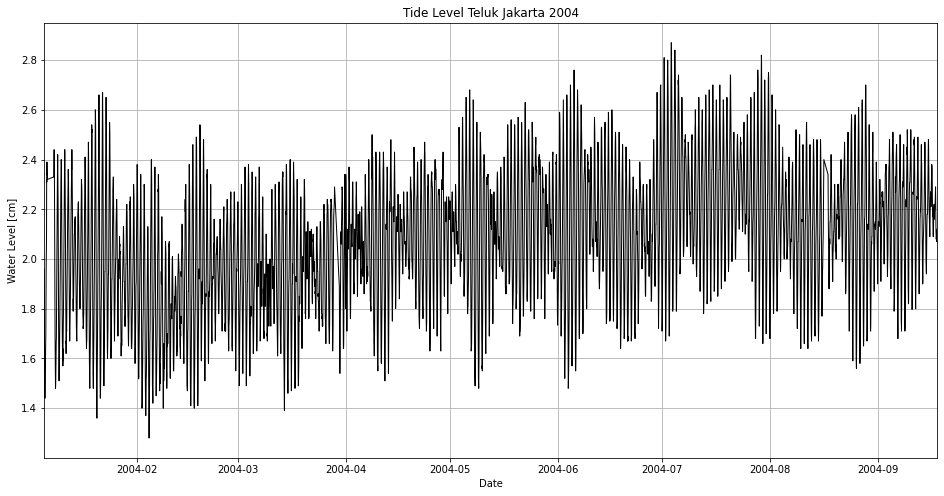

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8),facecolor="white")
ax.plot(df['tanggal'],df['elevasi (m)'],color='black',linewidth=1)
ax.set(xlabel='Date', ylabel='Water Level [cm]',
       title='Tide Level Teluk Jakarta 2004')
ax.grid()
ax.margins(x=0)
plt.savefig('save as png.png')
plt.show()


In [66]:
#menyimpan grafik elevasi pasut
plt.savefig('pasut_jakarta.png')

<Figure size 432x288 with 0 Axes>

# Tentang Pytide

Pytides adalah library Python untuk analisis dan prediksi pasang surut. Pytides dapat digunakan untuk memperkirakan pasang surut di lokasi tertentu dari pasang surut sebelumnya. Metode yang digunakan adalah konstituen harmonik, khususnya seperti yang digunakan oleh P. Schureman dalam Publikasinya tahun 1958. Perhitungan amplitudo dan fase menggunakan fungsi Least Square dari Scipy. Pytides saat ini mendukung konstituen yang digunakan oleh NOAA. Oleh karena itu dimungkinkan untuk menggunakan amplitudo dan fase yang diterbitkan oleh NOAA secara langsung.

# e) Dekomposisi komponen pasang surut

1. Syntax _sensor1 = sensor - sensor.mean()_ digunakan untuk membuat data pasang surut berada pada datum MSL yang sesuai digunakan oleh NOAA atau Z0 = 0. Dapat dibaca pada https://tidesandcurrents.noaa.gov/harcon.html?id=9410170
2. Fungsi _decompose_ untuk menghitung amplitude dan phase serta membagi masing-masing komponen harmonik pasang surut.

In [18]:
#ekstrak tanggal dari variabel df menjadi variabel tanggal2
tanggal2 = df['tanggal']


In [19]:
#tampilkan variabel tanggal2
tanggal2

103    2004-01-05 07:00:00
104    2004-01-05 08:00:00
105    2004-01-05 09:00:00
106    2004-01-05 10:00:00
107    2004-01-05 11:00:00
               ...        
6261   2004-09-17 21:00:00
6262   2004-09-17 22:00:00
6263   2004-09-17 23:00:00
6264   2004-09-18 00:00:00
6265   2004-09-18 01:00:00
Name: tanggal, Length: 6060, dtype: datetime64[ns]

In [20]:
#ubah tanggal menjadi array
tanggal3 = np.array(tanggal2)

In [28]:
#ubah tanggal menjadi datestimes
tanggal3 = pd.to_datetime(tanggal3)

In [29]:
type(tanggal3)

pandas.core.indexes.datetimes.DatetimeIndex

In [30]:
tanggal3

DatetimeIndex(['2004-01-05 07:00:00', '2004-01-05 08:00:00',
               '2004-01-05 09:00:00', '2004-01-05 10:00:00',
               '2004-01-05 11:00:00', '2004-01-05 12:00:00',
               '2004-01-05 13:00:00', '2004-01-05 14:00:00',
               '2004-01-05 15:00:00', '2004-01-05 16:00:00',
               ...
               '2004-09-17 16:00:00', '2004-09-17 17:00:00',
               '2004-09-17 18:00:00', '2004-09-17 19:00:00',
               '2004-09-17 20:00:00', '2004-09-17 21:00:00',
               '2004-09-17 22:00:00', '2004-09-17 23:00:00',
               '2004-09-18 00:00:00', '2004-09-18 01:00:00'],
              dtype='datetime64[ns]', length=6060, freq=None)

In [26]:
demeaned = df['elevasi (m)'] - df['elevasi (m)'].mean()

In [33]:
tide = Tide.decompose(demeaned, df.index.to_datetime())

AttributeError: 'Int64Index' object has no attribute 'to_datetime'

In [24]:
#cari nilai elevasi - rata2 elevasi
elevasi = df['elevasi (m)'] - df['elevasi (m)'].mean()

In [25]:
#tampilkan data elevasi
elevasi

103    -0.121273
104    -0.271273
105    -0.421273
106    -0.531273
107    -0.601273
          ...   
6261    0.008727
6262   -0.011273
6263   -0.011273
6264    0.018727
6265    0.038727
Name: elevasi (m), Length: 6060, dtype: float64

In [96]:
# data elevasi di convert menjadi array
elevasi2 = np.array(elevasi)

In [103]:
type(elevasi2)

numpy.ndarray

In [101]:
#hitung amplitudo dan fase serta membagi masing2 komponen harmonik
tide = Tide.decompose(elevasi2, tanggal3)


In [102]:
print(tide)

# d) Memisahkan konstituen menjadi DataFrame

Data nama konstitiuen dengan data amplitude/phasenya terpisah dalam array yang berbeda, sehingga disatukan dalam satu DataFrame agar dapat diplot dalam satu tabel yang sama.

In [109]:
constituent = [c.name for c in tide.model['constituent']]
df2 = DataFrame(tide.model, index=constituent).drop('constituent', axis=1)
df2.insert(2, 'constituents', constituent)

In [110]:
df2

amplitude       phase constituents
Z0       2.054242e-15    0.000000           Z0
M2       5.927525e-02  144.170126           M2
S2       4.807675e-02   64.514963           S2
N2       1.809953e-02   97.806942           N2
K1       2.607252e-01   31.784667           K1
M4       4.798983e-03   70.264075           M4
O1       1.362116e-01   17.441848           O1
M6       1.657813e-03   41.636015           M6
MK3      6.066851e-03   35.906976          MK3
S4       7.812659e-04   16.961147           S4
MN4      3.224626e-03   37.243692          MN4
nu2      6.462014e-03  144.685177          nu2
S6       1.893223e-04  280.341579           S6
mu2      1.039778e-02  349.119194          mu2
2N2      8.231993e-03   94.570758          2N2
OO1      1.223009e-02   96.347113          OO1
lambda2  5.668838e-03  267.066848      lambda2
S1       2.812414e-02  243.290831           S1
M1       4.672669e-03  309.297069           M1
J1       2.055563e-02   71.940502           J1
Mm       1.268722e-02   86.933997           Mm
MSF      5.627372e-03  326.947003          MSF
Mf       9.167711e-03  349.871893           Mf
rho1     8.337386e-03  356.400889         rho1
Q1       3.695804e-02    7.158353           Q1
T2       7.184599e-03   93.272181           T2
R2       1.277730e-02   35.624919           R2
2Q1      6.393645e-03  327.831842          2Q1
P1       6.926783e-02   35.316226           P1
2SM2     3.570332e-03  216.726994         2SM2
M3       2.638062e-03  244.740178           M3
L2       7.593451e-03  212.411406           L2
2MK3     2.756188e-03  353.122494         2MK3
K2       2.086828e-02   44.199004           K2
M8       4.274817e-04  187.554917           M8
MS4      4.966039e-03  139.995196          MS4

# e) Menampilkan konstituen pasang surut dalam tabel

1. Fungsi _create_table_ berfungsi untuk membuat tabel dari data df.
2. Fungsi _update_layout_ berfungsi untuk mengatur layout pada tabel.

In [111]:
fig =  ff.create_table(df2)
fig.update_layout(
    autosize=True,
    width=800,
    height=800,
)
fig.show()

# f) Menampilkan bilangan Formzahl dan tipe pasang surut

1. Fungsi _form_number_ digunakan untuk menghitung bilangan Formzahl dengan rumus:
        F = (O1 + K1)/(M2 + S2)
2. Fungsi _classify_ digunakan untuk menentukan tipe pasang surut sesuai bilangan Formzahl.

In [112]:
print('Form number %s, the tide is %s.' %
      (tide.form_number()[0], tide.classify()))

Form number 3.697526554409186, the tide is diurnal.


# g) Membuat prediksi pasang surut

1. Fungsi _cumsum_ digunakan untuk jumlah akumulasi array dari sumbu yang ditentukan.
2. Fungsi _r__ digunakan utuk mengubah dara irisan menjadi sebuah array di sepanjang sumbu.
3. Fungsi _total_seconds_ digunakan untuk menghitung banyaknya detik dari datetime yang terhitung.
4. Fungsi _diff_ digunakan untuk menghitung perbedaan secara diskrit pada sumbu data ynag diketahui
5. Fungsi __times_ digunakan untuk membuat timestamp dalam PyTides dengan frequensi perjam (H).
6. Fungsi _Series_ digunakan untuk membuat data series dari prediksi yang digunakan.
7. Fungsi _at_ digunakan untuk memprediksi pasang surut pada waktu tertentu.

In [120]:
#ekstrak nilai elefasi dari df
elevasi1 = df['elevasi (m)']

In [123]:
#konversi elevasi menjadi array
elevasi1 = np.array(elevasi1)

In [124]:
#menghitung prediksi pasut
hours = np.cumsum(np.r_[0, [t.total_seconds() / 3600.0
                            for t in np.diff(tanggal3.to_pydatetime())]])
times = Tide._times(tanggal3[0], hours)
predconst = Series(tide.at(times) + elevasi1.mean(), index=tanggal3)

# h) Menghitung RMSE

1. Fungsi _sum_ untuk menjumlahkan keseluruhan data array.
2. Fungsi _square_ untuk mengkuadratkan data array.
3. Fungsi _subtract_ untuk mengurangi data pada array.
4. Fungsi _sqrt_ untuk membuat akar dari sebuah nilai.

Rumus MSE: 

    MSE = (1/n) * Sum(Y-Y1)^2
    
Keterangan

    n = Jumlah data
    Y = Data observasi
    Y1 = Data prediksi

In [125]:
#mencari nilai MSE dan RMSE
MSE = (np.sum(np.square(np.subtract(elevasi1,predconst))))/len(elevasi2)
RMSE = math.sqrt(MSE)
print(RMSE)

0.13701078300097713


# i) Menampilkan grafik prediksi vs observasi

1. Fungsi _subplots_ untuk membuat gambar/grafik. _figsize_ untuk menentukan ukuran gambar. _facecolor_ untuk latar belakang/background.
2. Fungsi _scatter_ untuk membuat tampilan grafik scatter dengan berbagai parameter.
3. Fungsi _plot_ adalah untuk membuat tampilan grafik line.
4. Fungsi _set_title_ digunakan untuk membuat judul pada grafik.
5. Fungsi _legend_ untuk menampilkan legenda atau label pada grafik.
6. Fungsi _set_ylabel_ digunakan untuk memberikan label pada sumbu y.
7. Fungsi _set_xlabel_ digunakan untuk memberikan label pada sumbu x.
8. Fungsi _margins_ digunakan untuk membuat posisi grafik sumbu x pada nilai 0.
9. Fungsi _xticks_ digunakan untuk mengatur tampilan nilai di sumbu x.
10. Fungsi _yticks_ digunakan untuk mengatur tampilan nilai di sumbu y.
11. Fungsi _grid_ untuk menampilkan grid pada grafik.

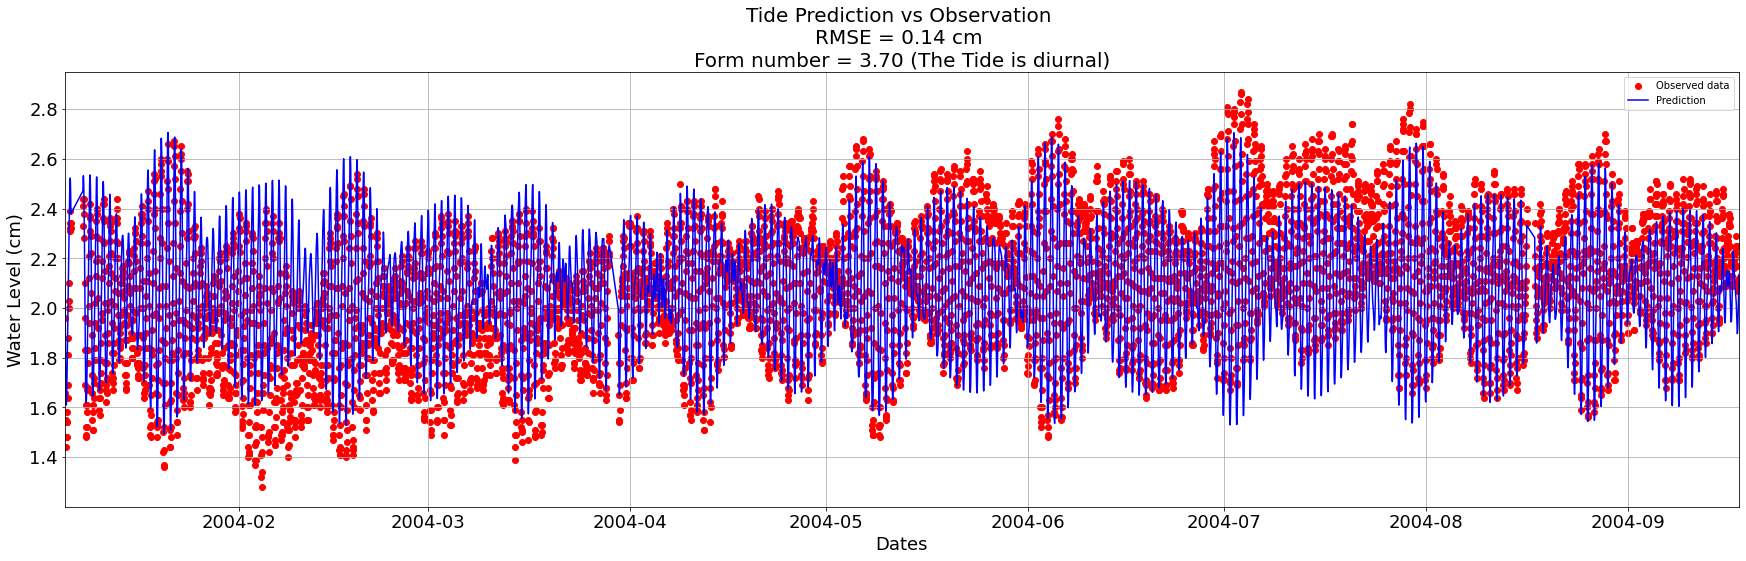

In [133]:
#membuat grafik obvservasi vs pediksi
fig, (ax1) = plt.subplots(1, 1, sharex=True,figsize=(30,8),facecolor="white")
ax1.scatter(tanggal3,elevasi1,color='r',label='Observed data', linewidth=1) #scater plot utk observasi
ax1.plot(tanggal3,predconst,color='b',label=f'Prediction') #line chart utk prediksi
ax1.set_title(f'Tide Prediction vs Observation \nRMSE = {"%.2f" %RMSE} cm \nForm number = {"%.2f" %tide.form_number()[0]} (The Tide is {tide.classify()})',fontsize=20)
leg = ax1.legend(loc='best')
ax1.set_ylabel('Water Level (cm)',fontsize=18)
ax1.set_xlabel('Dates',fontsize=18)
ax1.margins(x=0)
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
ax1.grid()
plt.savefig('pasut_jakarta (obs vs predic).png') #menyimpan gambar 
plt.show() #menampilkan gambar

# j) Menampilkan grafik residual pasang surut

1. Fungsi _subplots_ untuk membuat gambar/grafik. _figsize_ untuk menentukan ukuran gambar. _facecolor_ untuk latar belakang/background.
2. Fungsi _plot_ adalah untuk membuat tampilan grafik line.
3. Fungsi _set_title_ digunakan untuk membuat judul pada grafik.
4. Fungsi _legend_ untuk menampilkan legenda atau label pada grafik.
5. Fungsi _set_ylabel_ digunakan untuk memberikan label pada sumbu y.
6. Fungsi _set_xlabel_ digunakan untuk memberikan label pada sumbu x.
7. Fungsi _margins_ digunakan untuk membuat posisi grafik sumbu x pada nilai 0.
8. Fungsi _xticks_ digunakan untuk mengatur tampilan nilai di sumbu x.
9. Fungsi _yticks_ digunakan untuk mengatur tampilan nilai di sumbu y.
10. Fungsi _grid_ untuk menampilkan grid pada grafik.

In [127]:
len(predconst)

6060

In [128]:
len(elevasi1)

6060

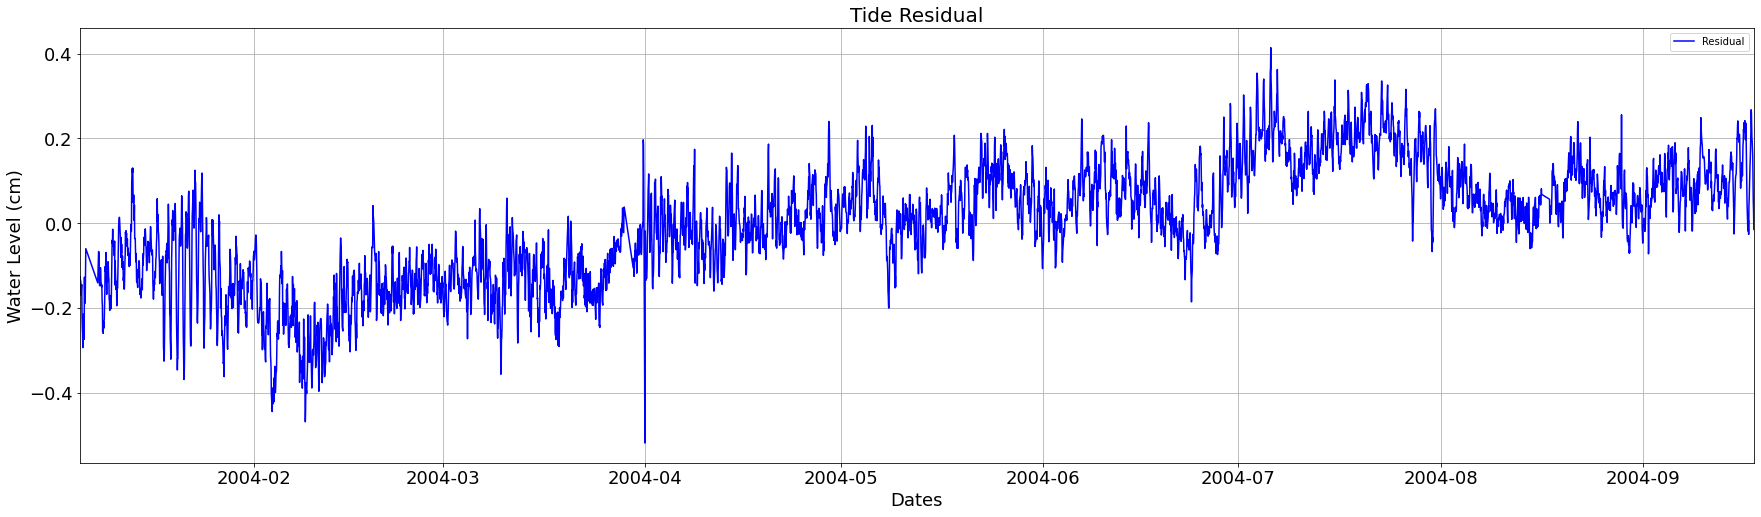

In [134]:
#membuat grafik residu pasang surut
fig, (ax1) = plt.subplots(1, 1, sharex=True,figsize=(30,8),facecolor="white")
ax1.plot(tanggal3,elevasi1-predconst,color='b',label=f'Residual')
ax1.set_title(f'Tide Residual',fontsize=20)
leg = ax1.legend(loc='best')
ax1.set_ylabel('Water Level (cm)',fontsize=18)
ax1.set_xlabel('Dates',fontsize=18)
ax1.margins(x=0)
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
ax1.grid()
plt.savefig('pasut_jakarta (residual).png')

# k) Prediksi Pasang Surut Lanjutan

1. Fungsi _cumsum_ digunakan untuk jumlah akumulasi array dari sumbu yang ditentukan.
2. Fungsi _r__ digunakan utuk mengubah dara irisan menjadi sebuah array di sepanjang sumbu.
3. Fungsi _total_seconds_ digunakan untuk menghitung banyaknya detik dari datetime yang terhitung.
4. Fungsi _diff_ digunakan untuk menghitung perbedaan secara diskrit pada sumbu data ynag diketahui
5. Fungsi __times_ digunakan untuk membuat timestamp dalam PyTides dengan frequensi perjam (H).
6. Fungsi _Series_ digunakan untuk membuat data series dari prediksi yang digunakan.
7. Fungsi _at_ digunakan untuk memprediksi pasang surut pada waktu tertentu.

In [136]:
tanggalpred = date_range(start='01/01/2022 00:00:00', end='01/31/2022 23:00:00',freq='1H')
hours = np.cumsum(np.r_[0, [t.total_seconds() / 3600.0
                            for t in np.diff(tanggalpred.to_pydatetime())]])
times = Tide._times(tanggalpred[0], hours)
prediction = Series(tide.at(times) + elevasi1.mean(), index=tanggalpred)

# l) Menampilkan prediksi pasang surut

1. Fungsi _subplots_ untuk membuat gambar/grafik. _figsize_ untuk menentukan ukuran gambar. _facecolor_ untuk latar belakang/background.
2. Fungsi _plot_ adalah untuk membuat tampilan grafik line.
3. Fungsi _set_title_ digunakan untuk membuat judul pada grafik.
4. Fungsi _legend_ untuk menampilkan legenda atau label pada grafik.
5. Fungsi _set_ylabel_ digunakan untuk memberikan label pada sumbu y.
6. Fungsi _set_xlabel_ digunakan untuk memberikan label pada sumbu x.
7. Fungsi _margins_ digunakan untuk membuat posisi grafik sumbu x pada nilai 0.
8. Fungsi _xticks_ digunakan untuk mengatur tampilan nilai di sumbu x.
9. Fungsi _yticks_ digunakan untuk mengatur tampilan nilai di sumbu y.
10. Fungsi _grid_ untuk menampilkan grid pada grafik.

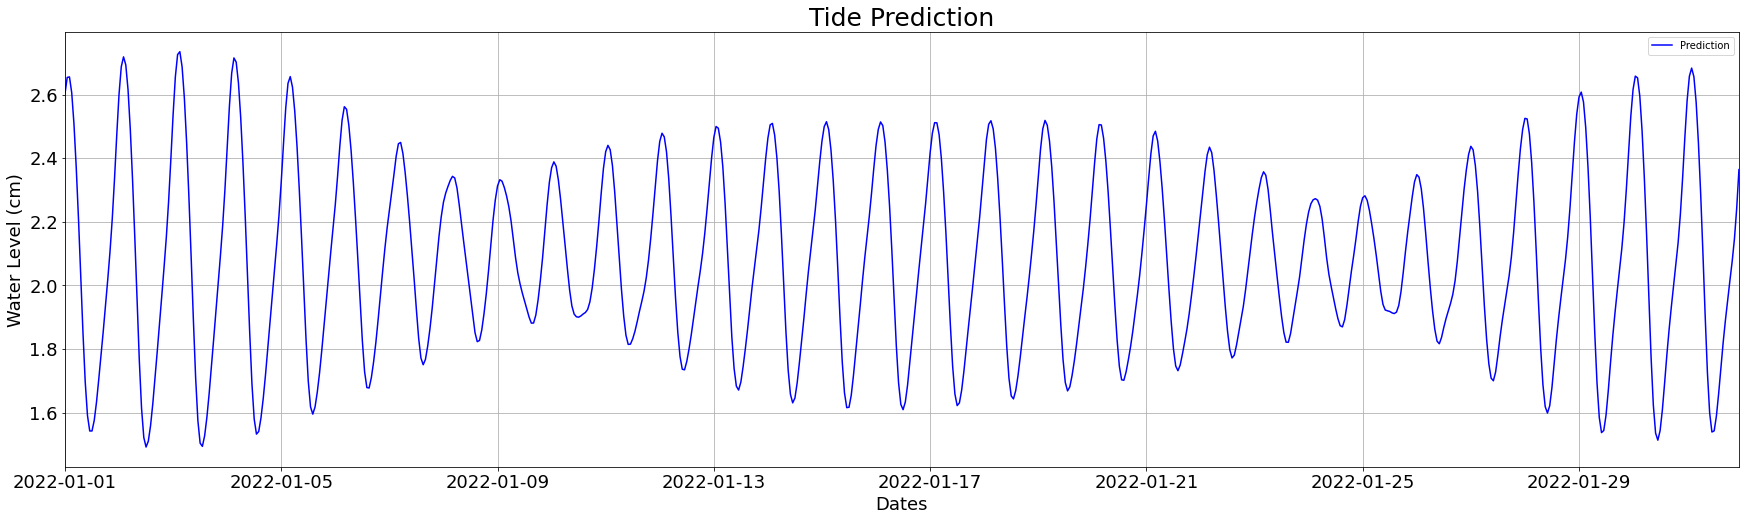

In [143]:
fig, (ax1) = plt.subplots(1, 1, sharex=True,figsize=(30,8),facecolor="white")
ax1.plot(tanggalpred,prediction,color='b',label=f'Prediction')
ax1.set_title(f'Tide Prediction',fontsize=25)
leg = ax1.legend(loc='best')
ax1.set_ylabel('Water Level (cm)',fontsize=18)
ax1.set_xlabel('Dates',fontsize=18)
ax1.margins(x=0)
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
ax1.grid()
plt.savefig('pasut_jakarta (tide prediction).png')